# Exploratory Data Analysis
---

In [1]:
#Importing modules and data
import pandas as pd
import string
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os
import datetime as dt 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams['font.size'] = 15
width = 0.75
from wordcloud import WordCloud
sns.set_palette(sns.color_palette('tab20', 20))
import plotly.graph_objs as go
from datetime import date, timedelta
from empath import Empath
lexicon = Empath()
import math
from textblob import TextBlob

import chart_studio.plotly as py
from plotly.offline import iplot
import plotly.figure_factory as ff
InteractiveShell.ast_node_interactivity = 'all'
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv('/Users/qab/Desktop/Personal/NLP Projects/Context Maturity (NLP)/Data/jon_bellion.csv')

In [2]:
data.head()

,titles,album,date_released,lyrics,processed_lyrics
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...


## Drawing Empath Themes

In [3]:
#Finds the empath themes in the lyrics
def extract_empath(lyrics):
    return lexicon.analyze(lyrics)

#Creates tags with the empath themes based on score
def make_tags(tags):
    tgs = [k for k, v in tags.items() if v != 0] #Helps set limit on tags to be kept
    #tgs = sorted(tags.items(), key = lambda x: x[1], reverse = True)
    return tgs

#Processes the dictionary of tags and keeps the keys
def process(st):
    st = str(st)
    table = str.maketrans(dict.fromkeys(string.punctuation))
    new_s = st.translate(table)
    return new_s

data['empath_themes'] = data['lyrics'].apply(extract_empath).apply(make_tags).apply(process).apply(lambda x: ''.join(x))

In [4]:
data.head(10)

,titles,album,date_released,lyrics,processed_lyrics,empath_themes
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,help office dance wedding domesticwork cold ha...
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,office dance wedding domesticwork sleep family...
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,help dance domesticwork sleep cold hate envy f...
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,dance domesticwork vacation masculine sufferin...
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,hate family vacation horror swearingterms suff...
5,the wonder years,translation_through_speakers,"February 20, 2013","[Verse 1]\nBefore the war, before the lives\nB...",war live brother leave night kid sing ...,sleep family crime prison swearingterms magic ...
6,timeless,translation_through_speakers,"February 20, 2013",[Chorus]\nFell asleep I had a kick-ass dream\n...,fell asleep kickass dream me frank sinatra jam...,dance sleep hate family vacation masculine ner...
7,waves of loneliness,translation_through_speakers,"February 20, 2013",[Verse 1]\nIt's so empty right where your head...,empty right head sleep say still smell cologn...,help sleep swearingterms suffering furniture s...
8,while you count sheep,translation_through_speakers,"February 20, 2013","[Intro]\nDum, dum, dum, dum, dum, dum\nDum, du...",beautiful mind mind mind literall...,dance money domesticwork sleep medicalemergenc...
9,wutup snow,translation_through_speakers,"February 20, 2013","[Pre-Chorus: Jon Bellion]\nHer body is cold, t...",body cold conversation cocaine call snow new ...,office dance medicalemergency cold occupation ...


In [5]:
#Number of songs per album
data.groupby('album').count()['titles'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Number of songs', 
    linecolor='black', 
    opacity=0,
    title='Bar chart of songs per album release', 
    xTitle='Albums'
    )

## Word count of lyrics before and after text preprocessing.

In [6]:
# Word count
word_count = lambda x: len(str(x).split())
data['song_length'] = data['lyrics'].astype(str).apply(len)
data['lyrics_word_count'] = data['lyrics'].apply(word_count)
data['processed_lyrics_word_count'] = data['processed_lyrics'].apply(word_count)
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes,song_length,lyrics_word_count,processed_lyrics_word_count
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,help office dance wedding domesticwork cold ha...,2454,474,263
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,office dance wedding domesticwork sleep family...,2120,408,179
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,help dance domesticwork sleep cold hate envy f...,3103,598,267
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,dance domesticwork vacation masculine sufferin...,1614,309,129
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,hate family vacation horror swearingterms suff...,1865,367,198


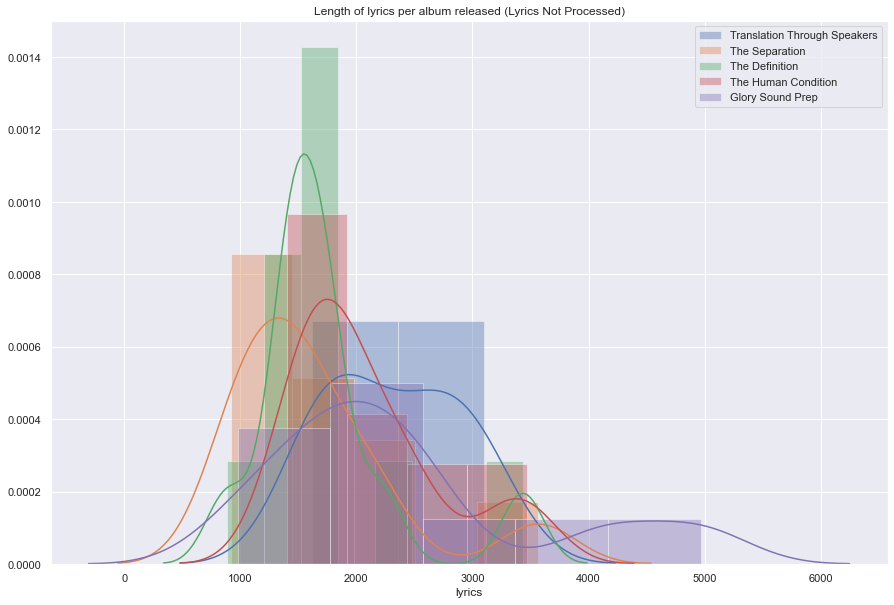

In [7]:
# Length of all songs per album for unprocessed lyrics
sns.set(rc = {'figure.figsize':(15, 10)})
album1 = data[data['album'] == 'translation_through_speakers']['lyrics'].str.len()
sns.distplot(album1, label = 'Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['lyrics'].str.len()
sns.distplot(album2, label = 'The Separation')
album3 = data[data['album'] == 'the_definition']['lyrics'].str.len()
sns.distplot(album3, label = 'The Definition')
album4 = data[data['album'] == 'the_human_condition']['lyrics'].str.len()
sns.distplot(album4, label = 'The Human Condition')
album5 = data[data['album'] == 'glory_sound_prep']['lyrics'].str.len()
sns.distplot(album5, label = 'Glory Sound Prep')
plt.title('Length of lyrics per album released (Lyrics Not Processed)')
plt.legend();

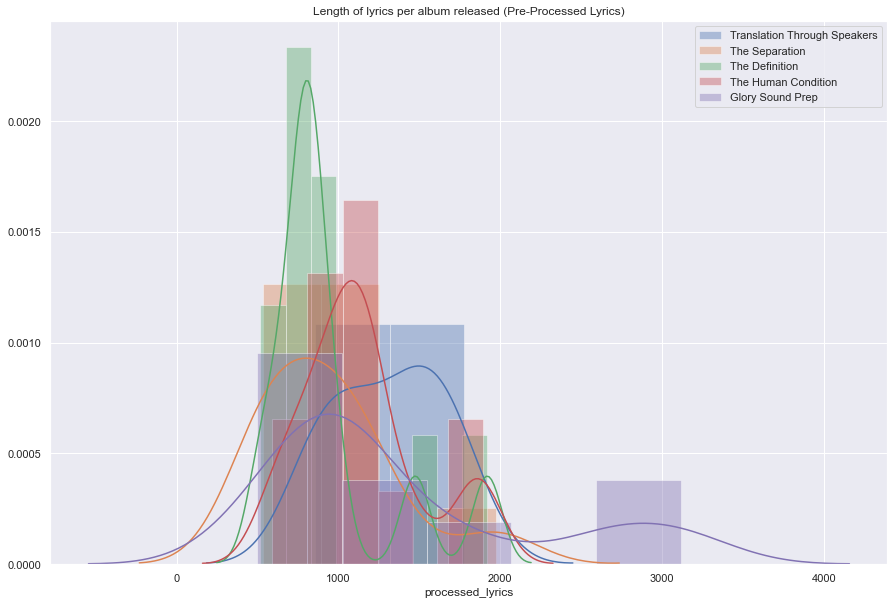

In [12]:
# Length of all songs per album for processed lyrics
sns.set(rc = {'figure.figsize':(15, 10)})
album1 = data[data['album'] == 'translation_through_speakers']['processed_lyrics'].str.len()
sns.distplot(album1, label = 'Translation Through Speakers')
album2 = data[data['album'] == 'the_separation']['processed_lyrics'].str.len()
sns.distplot(album2, label = 'The Separation')
album3 = data[data['album'] == 'the_definition']['processed_lyrics'].str.len()
sns.distplot(album3, label = 'The Definition')
album4 = data[data['album'] == 'the_human_condition']['processed_lyrics'].str.len()
sns.distplot(album4, label = 'The Human Condition')
album5 = data[data['album'] == 'glory_sound_prep']['processed_lyrics'].str.len()
sns.distplot(album5, label = 'Glory Sound Prep')
plt.title('Length of lyrics per album released (Pre-Processed Lyrics)')
plt.legend();

In [8]:
#Distribution of songs and their length
data['song_length'].iplot(
    kind = 'hist',
    bins = 56, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Song Length',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Song Length Distribution')

In [9]:
# Word count of lyrics before and after cleaning
data[['lyrics_word_count', 'processed_lyrics_word_count']].iplot(
    kind = 'hist',
    bins = 20, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Word Count',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Lyrics Count Per Song Distribution Before and After Pre-processing')

## Sentiment and Subjectivity

In [10]:
#Setting polarity and subjectivity with Textblob
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

#Creating new features for polarity and subjectivity
data['polarity'] = data['lyrics'].apply(pol)
data['subjectivity'] = data['lyrics'].apply(sub)
data.head()

,titles,album,date_released,lyrics,processed_lyrics,empath_themes,song_length,lyrics_word_count,processed_lyrics_word_count,polarity,subjectivity
0,dead man wallking,translation_through_speakers,"February 20, 2013","[Intro]\nYou know, maybe I'm drunk, maybe I'm ...",know maybe drunk maybe maybe happened maybe ca...,help office dance wedding domesticwork cold ha...,2454,474,263,0.032692,0.464957
1,dont ask cuz i dont know,translation_through_speakers,"February 20, 2013","[Verse 1]\nYeah, see, check the bounce out\nWe...",see check bounce welcome dope flow welcome bo...,office dance wedding domesticwork sleep family...,2120,408,179,0.309140,0.495161
2,for the dreamers,translation_through_speakers,"February 20, 2013","[Intro: Jon Bellion]\nLike some dope shit, ohh...",like dope shit like mad people ...,help dance domesticwork sleep cold hate envy f...,3103,598,267,0.027602,0.655745
3,life,translation_through_speakers,"February 20, 2013",[Verse 1]\n22 and confused\nOn what to do and ...,confuse set kind drunk sort high break miss a...,dance domesticwork vacation masculine sufferin...,1614,309,129,0.052500,0.697500
4,paper planes,translation_through_speakers,"February 20, 2013","[Verse 1]\nOh, that ass, it was so first class...",ass first class copilot mile high swag would ...,hate family vacation horror swearingterms suff...,1865,367,198,0.241650,0.562948


In [11]:
data.describe()

,song_length,lyrics_word_count,processed_lyrics_word_count,polarity,subjectivity
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,2031.321429,394.214286,186.178571,0.067117,0.518335
std,822.277660,152.335242,80.995422,0.161391,0.135905
min,889.000000,177.000000,83.000000,-0.442708,0.198056
25%,1552.750000,298.500000,132.750000,-0.015400,0.448355
50%,1794.500000,360.500000,167.000000,0.071917,0.516809
75%,2436.500000,442.500000,217.250000,0.172301,0.604329
max,4965.000000,926.000000,487.000000,0.525000,0.931250


## Visualising the sentiment and subectivity of songs

In [12]:
# Sentiment polarity distribution - shows polarity range and number of songs in that range
data['polarity'].iplot(
    kind = 'hist',
    bins = 56, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Lyrics Polarity',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Sentiment Polarity Distribution')

In [13]:
# Subjectivity distribution - shows subjectivity range and number of songs in that range
data['subjectivity'].iplot(
    kind = 'hist',
    bins = 56, #A small database so I limited this to the number of rows so the spread will be even. 
    xTitle = 'Lyrics Subjectivity',
    linecolor = 'black',
    yTitle = 'Number of Songs',
    title = 'Subjectivity Distribution')

In [14]:
# A 2D density jointplot comparing sentiment and the length of the songs
trace1 = go.Scatter(
    x=data['polarity'], y=data['song_length'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=data['polarity'], y=data['song_length'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=data['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=data['song_length'], name='Song Length density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
plot_data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=plot_data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

In [15]:
# A 2D density jointplot comparing subjectivity and the length of the songs
trace1 = go.Scatter(
    x=data['polarity'], y=data['subjectivity'], mode='markers', name='points',
    marker=dict(color='rgb(102,0,0)', size=2, opacity=0.4)
)
trace2 = go.Histogram2dContour(
    x=data['polarity'], y=data['subjectivity'], name='density', ncontours=20,
    colorscale='Hot', reversescale=True, showscale=False
)
trace3 = go.Histogram(
    x=data['polarity'], name='Sentiment polarity density',
    marker=dict(color='rgb(102,0,0)'),
    yaxis='y2'
)
trace4 = go.Histogram(
    y=data['subjectivity'], name='Subjectivity density', marker=dict(color='rgb(102,0,0)'),
    xaxis='x2'
)
plot_data = [trace1, trace2, trace3, trace4]

layout = go.Layout(
    showlegend=False,
    autosize=False,
    width=600,
    height=550,
    xaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    yaxis=dict(
        domain=[0, 0.85],
        showgrid=False,
        zeroline=False
    ),
    margin=dict(
        t=50
    ),
    hovermode='closest',
    bargap=0,
    xaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    ),
    yaxis2=dict(
        domain=[0.85, 1],
        showgrid=False,
        zeroline=False
    )
)

fig = go.Figure(data=plot_data, layout=layout)
iplot(fig, filename='2dhistogram-2d-density-plot-subplots')

Text(0.03769230769230771, 0.46995726495726503, 'dead man wallking')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.3141397849462365, 0.5001612903225807, 'dont ask cuz i dont know')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.03260169724455439, 0.6607445200302341, 'for the dreamers')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.057499999999999996, 0.7024999999999999, 'life')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.2466498015873016, 0.5679484126984125, 'paper planes')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.06055555555555555, 0.23259462759462757, 'the wonder years')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.12519400352733684, 0.5318298059964727, 'timeless')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.2886734693877551, 0.5672448979591838, 'waves of loneliness')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.0925, 0.5591666666666667, 'while you count sheep')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.10923310485810486, 0.6607970578803913, 'wutup snow')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.18000000000000005, 0.5754887218045114, '2 rocking chairs')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.2430353688864328, 0.621565349544073, 'eyes to the sky')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.18578282828282824, 0.5888383838383838, 'halloween')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.11548999309868876, 0.4331228433402347, 'jim morrison')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.09388888888888894, 0.43833333333333346, 'kingdom come')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.17640151515151511, 0.38397727272727267, 'newyorksoul')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.1989102564102564, 0.5774358974358974, 'one more time')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.024450757575757574, 0.5311363636363637, 'superman, the gift and the curse')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.23876068376068377, 0.44330891330891314, 'to my future wife...')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.20083333333333334, 0.6070833333333333, 'ungrateful eyes')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.06883955097190392, 0.5124807953484425, 'when the lions come')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.00863636363636364, 0.35500000000000004, 'a haunted house')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.029337121212121214, 0.2795265151515151, 'an immigrant')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.1391880341880342, 0.4541452991452992, 'carry your throne')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.15613945578231295, 0.47260204081632645, 'human')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.08334415584415583, 0.4993614718614719, 'jungle')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.017746598639455775, 0.48289115646258507, 'luxury')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.06411949685534588, 0.5788993710691824, 'munny right')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.0659090909090909, 0.6236363636363635, 'ooh')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.1287037037037037, 0.616064814814815, 'pre-occupied')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.03992630385487529, 0.4821116780045351, 'run wild')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.09547619047619046, 0.4592517006802721, 'simple and sweet')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.29414285714285715, 0.2851428571428572, "80's films")

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.002404637247569186, 0.33241211667913106, 'all time low')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.07799999999999997, 0.7307500000000003, 'fashion')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.53, 0.68, 'guillotine')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.016817750151083468, 0.4211242769576102, 'hand of god (outro)')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.03904181184668988, 0.3184320557491289, 'he is the same')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.18595238095238095, 0.49071428571428566, 'irobot')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.2713157894736842, 0.5439473684210526, 'maybe idk')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.19206790123456788, 0.6821604938271603, 'morning in america')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.10240137085137085, 0.4851040404040403, 'new york soul (part ii)')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.1992669172932331, 0.6860150375939849, 'overwhelming')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.35791005291005296, 0.5012962962962962, 'the good in me')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.05708333333333333, 0.48892857142857143, 'weight of the world')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.27902877986211316, 0.6032363315696648, 'woke the fuck up')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.12433248743593571, 0.5950140568244017, 'adult swim')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.03833333333333333, 0.2030555555555556, 'blu')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.010813492063492063, 0.3423412698412698, 'cautionary tales')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.07910714285714285, 0.4509821428571429, 'conversations with my wife')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.4377083333333333, 0.93625, 'couples retreat')

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.09222222222222216, 0.6760317460317461, 'jt')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.09423976608187139, 0.4910317460317459, "let's begin")

(-1.0, 1.0)

(0.0, 1.0)

Text(0.07583333333333335, 0.6644246031746032, "mah's joint")

(-1.0, 1.0)

(0.0, 1.0)

Text(-0.01568965517241377, 0.6733908045977011, 'stupid deep')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.09009070294784588, 0.5557936507936507, 'the internet')

(-1.0, 1.0)

(0.0, 1.0)

Text(0.5, 1.0, 'Sentiment and Subjectivity Plot')

Text(0.5, 0, '<-- Negative -------- Positive -->')

Text(0, 0.5, '<-- Facts -------- Opinions -->')

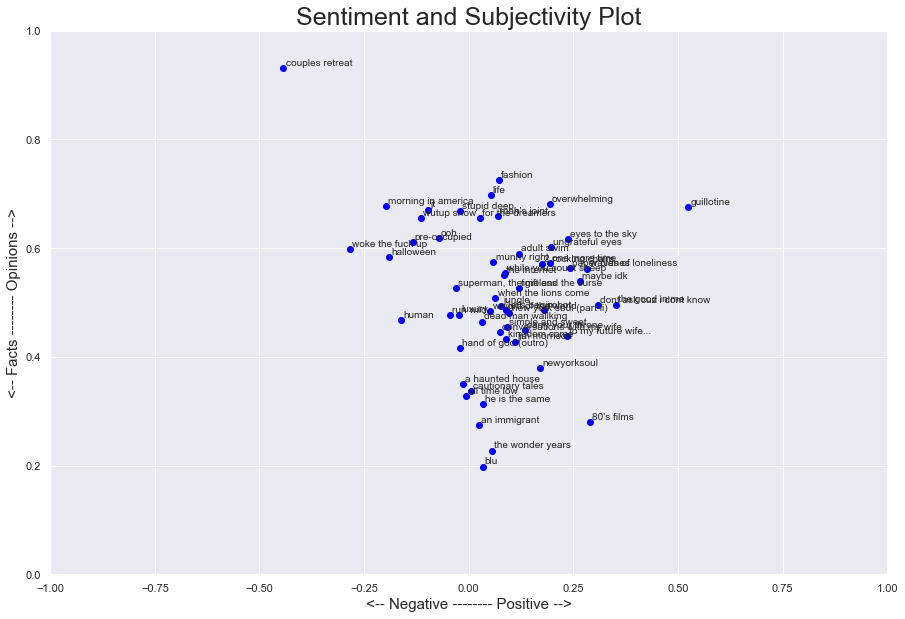

In [16]:
#Visualising polarity against subjectivity
plt.rcParams['figure.figsize'] = [15, 10]

for index, title in enumerate(data.index):
    x = data.polarity.loc[title]
    y = data.subjectivity.loc[title]
    plt.scatter(x, y, color='blue')
    plt.text(x+.005, y+.005, data['titles'][index], fontsize=10)
    plt.xlim(-1, 1)
    plt.ylim(0, 1)
    
plt.title('Sentiment and Subjectivity Plot', fontsize=25)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Drill down analysis of sentiment throughout the progression of the song

In [17]:
# A function to split lyrics into 'n' number of chunks
def split_text(text, n = 5):
    '''Takes in a string of text(lyrics) and splits into n equal parts, with a default of 10 equal parts.'''
    
    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [18]:
#Trying it out
list_pieces = []
for t in data.processed_lyrics:
    split = split_text(t)
    list_pieces.append(split)
    
#list_pieces

In [19]:
#Checking the polarity for the pieces of lyric chunks
polarity_lyrics = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_lyrics.append(polarity_piece)
    
#polarity_lyrics

Text(0.5, 1.0, '1')

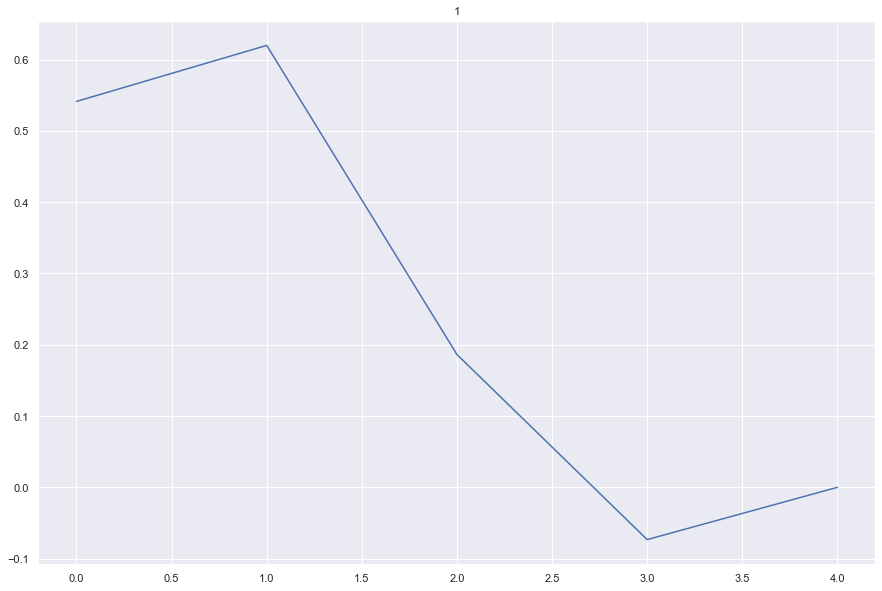

In [20]:
#Plotting sentment changes for the chunck of texts (lyrics)
plt.plot(polarity_lyrics[1])
plt.title(data['titles'].index[1])
plt.show()

Text(0.5, 1.0, 'dead man wallking')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'dont ask cuz i dont know')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'for the dreamers')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'life')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'paper planes')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'the wonder years')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'timeless')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'waves of loneliness')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'while you count sheep')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'wutup snow')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, '2 rocking chairs')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'eyes to the sky')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'halloween')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'jim morrison')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'kingdom come')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'newyorksoul')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'one more time')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'superman, the gift and the curse')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'to my future wife...')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'ungrateful eyes')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'when the lions come')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'a haunted house')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'an immigrant')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'carry your throne')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'human')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'jungle')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'luxury')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'munny right')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'ooh')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'pre-occupied')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'run wild')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'simple and sweet')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, "80's films")

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'all time low')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'fashion')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'guillotine')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'hand of god (outro)')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'he is the same')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'irobot')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'maybe idk')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'morning in america')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'new york soul (part ii)')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'overwhelming')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'the good in me')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'weight of the world')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'woke the fuck up')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'adult swim')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'blu')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'cautionary tales')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'conversations with my wife')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'couples retreat')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'jt')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, "let's begin")

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, "mah's joint")

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'stupid deep')

(-1.0, 1.0)

(0.0, 4.0)

Text(0.5, 1.0, 'the internet')

(-1.0, 1.0)

(0.0, 4.0)

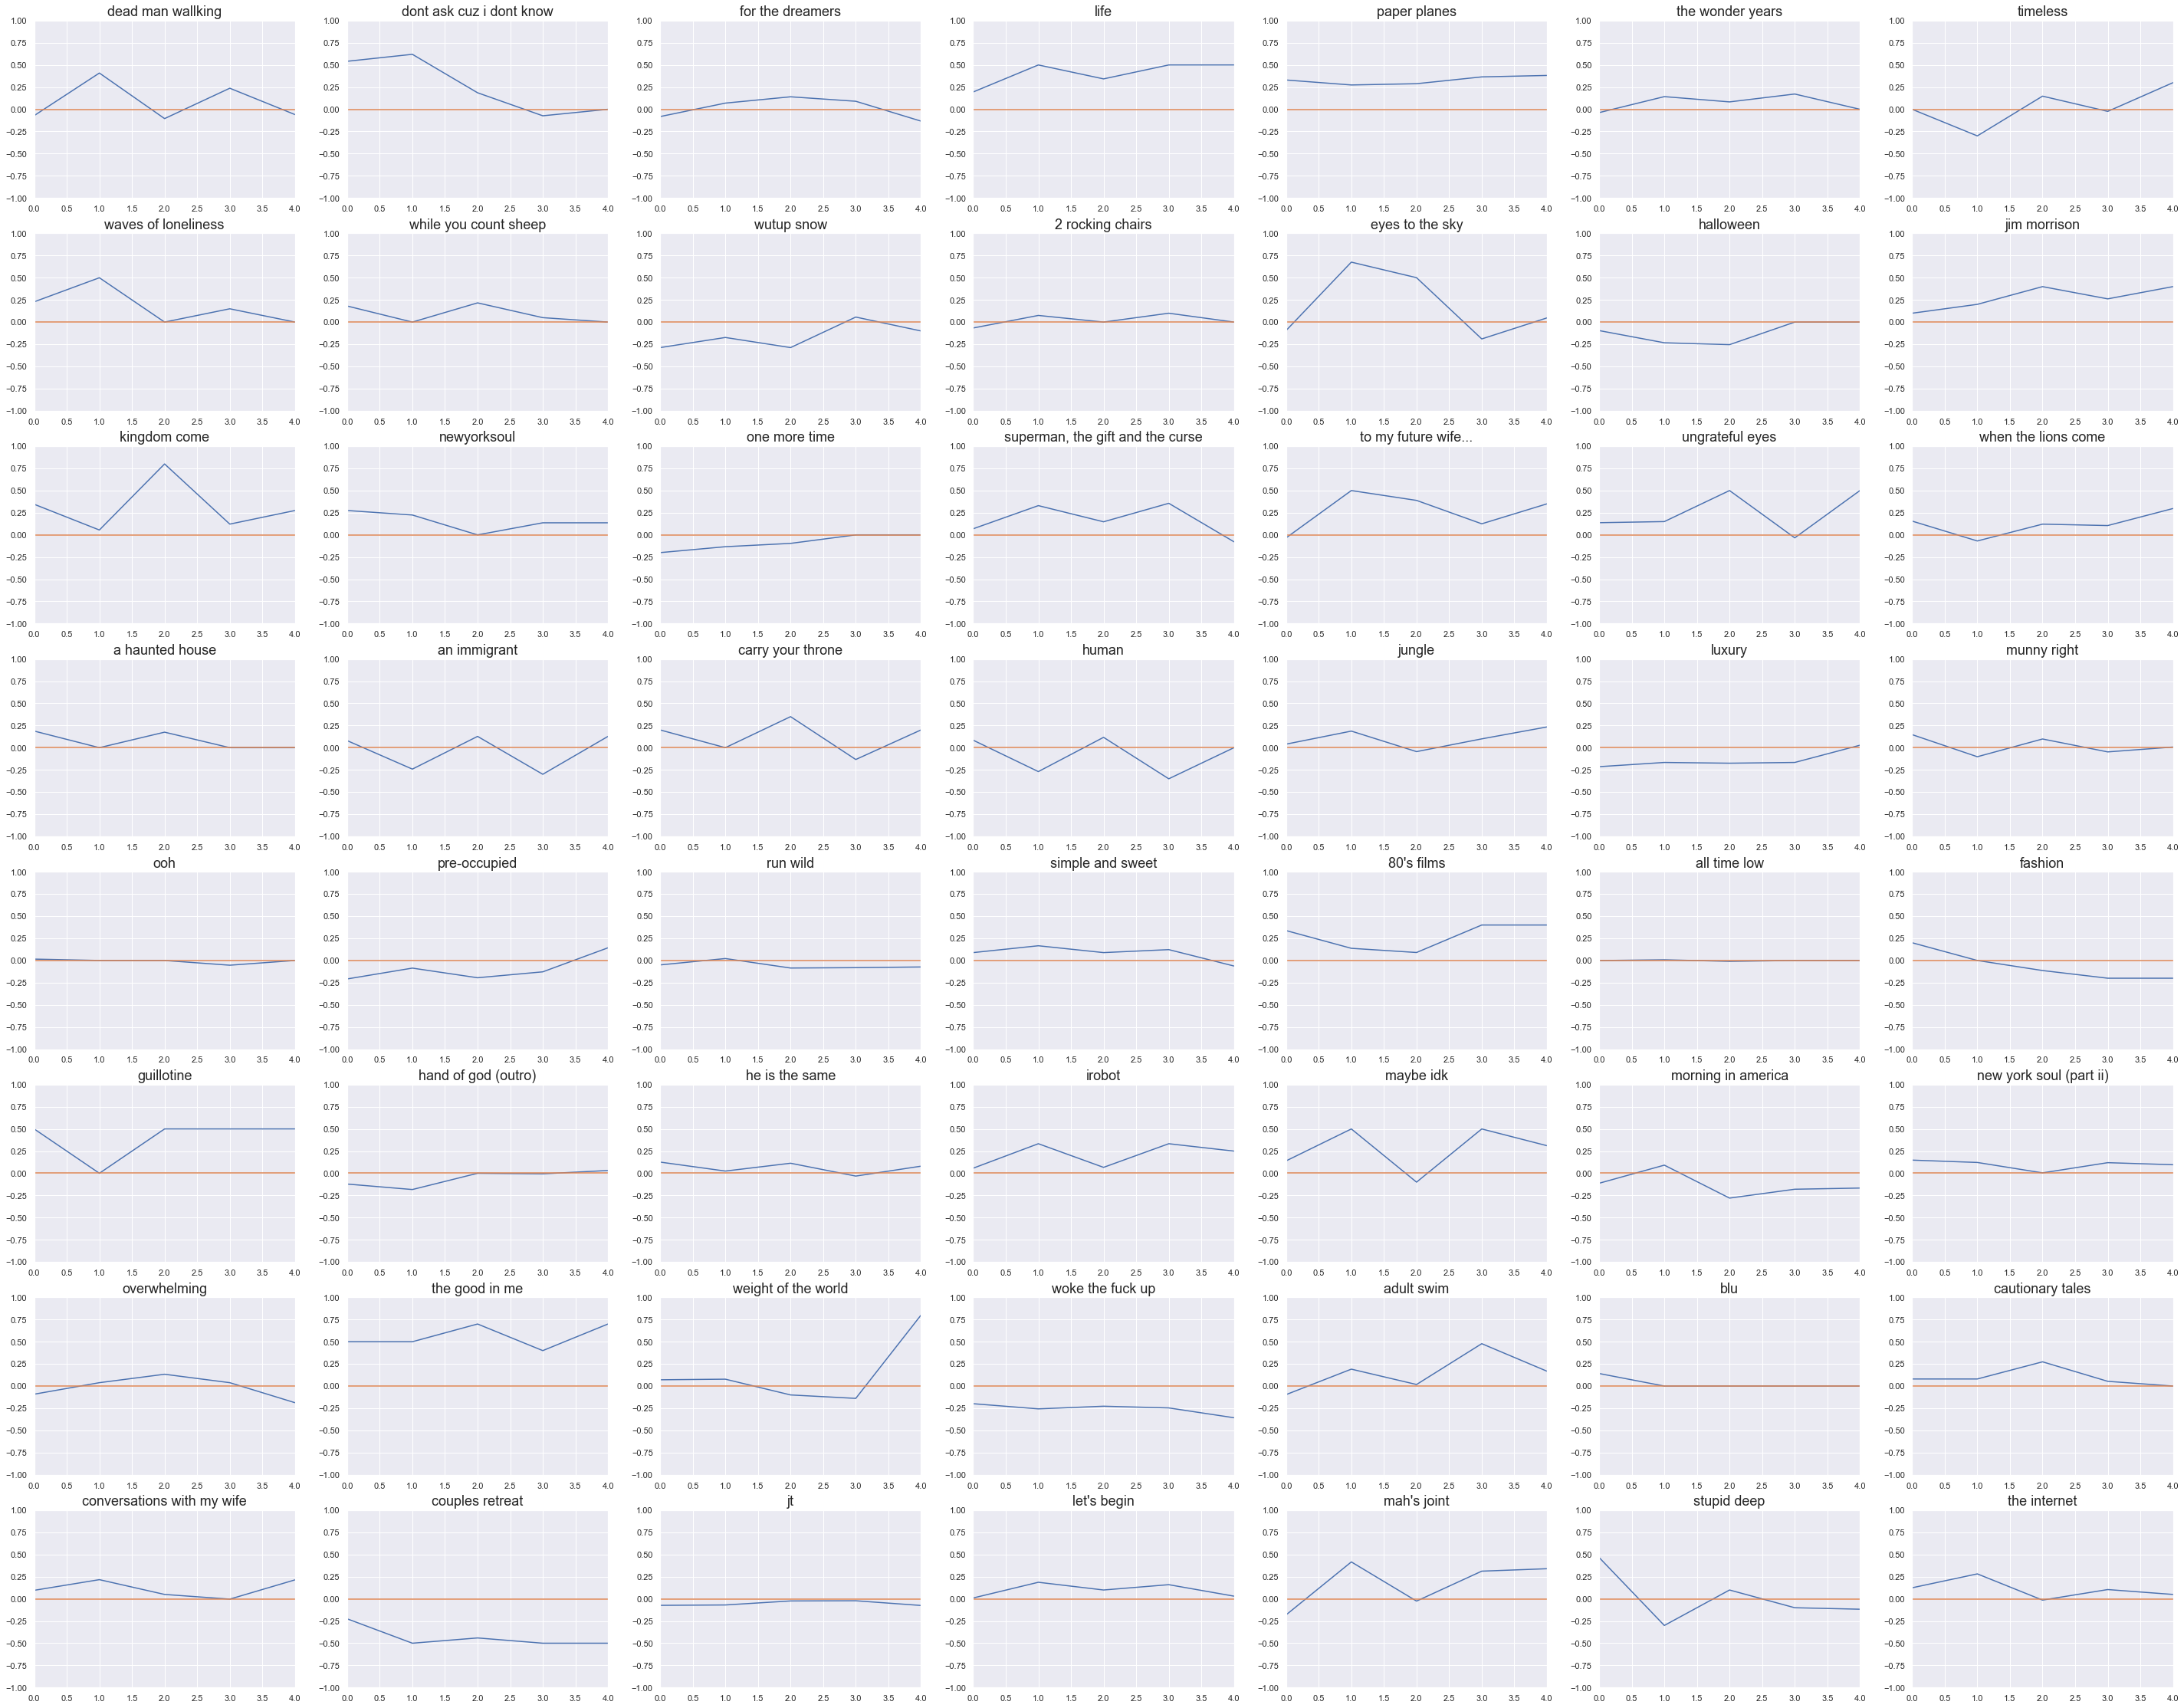

In [21]:
# Plotting for all songs
plt.rcParams['figure.figsize'] = [50, 40]

for index, title in enumerate(data.index):    
    plt.subplot(8, 7, index+1)
    plt.plot(polarity_lyrics[index])
    plt.plot(np.arange(0, 5), np.zeros(5))
    plt.title(data['titles'][index], fontsize = 18)
    plt.ylim(ymin=-1, ymax=1)
    plt.xlim(xmin=0, xmax=4)
    
plt.show()

In [22]:
# A boxplot showcasing the sentiment range for the albums
y0 = data.loc[data['album'] == 'translation_through_speakers']['polarity']
y1 = data.loc[data['album'] == 'the_separation']['polarity']
y2 = data.loc[data['album'] == 'the_definition']['polarity']
y3 = data.loc[data['album'] == 'the_human_condition']['polarity']
y4 = data.loc[data['album'] == 'glory_sound_prep']['polarity']

trace0 = go.Box(
    y = y0,
    name = 'Translation Through Speakers',
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)

trace1 = go.Box(
    y = y1,
    name = 'The Separation',
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y = y2,
    name = 'The Definition',
    marker = dict(
        color = 'rgb(10, 140, 208)',
    )
)

trace3 = go.Box(
    y = y3,
    name = 'The Human Condition',
    marker = dict(
        color = 'rgb(12, 102, 14)',
    )
)

trace4 = go.Box(
    y = y4,
    name = 'Glory Sound Prep',
    marker = dict(
        color = 'rgb(100, 0, 10)',
    )
)

box_data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(
    title = 'Sentiment Polarity Box Plot for Jon Bellion Albums'
)

fig = go.Figure(data = box_data, layout = layout)
iplot(fig, filename = 'Sentiment Polarity Box Plot for Jon Bellion Albums')

In [23]:
data.columns

Index(['titles', 'album', 'date_released', 'lyrics', 'processed_lyrics',
       'empath_themes', 'song_length', 'lyrics_word_count',
       'processed_lyrics_word_count', 'polarity', 'subjectivity'],
      dtype='object')

In [24]:
#Getting top words
def get_top_n_words(corpus, n = None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(data['processed_lyrics'], 20)

for word, freq in common_words:
    print(word, freq)
df1 = pd.DataFrame(common_words, columns = ['processed_lyrics' , 'count'])

low 212
like 175
know 156
get 147
need 111
come 105
go 86
cause 84
let 84
say 80
love 75
life 75
tell 75
take 68
try 68
call 62
hey 60
make 60
lose 59
still 58


In [25]:
#Plotting the top words and their frequency
df1.groupby('processed_lyrics').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar',
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 words in lyrics')

In [26]:
#Getting top number of bi-gramns
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(data['processed_lyrics'], 20)
for word, freq in common_words:
    print(word, freq)
    
df3 = pd.DataFrame(common_words, columns = ['processed_lyrics' , 'count'])

low low 203
hey hey 31
dead man 23
new york 23
know know 21
nothing changed 20
know maybe 19
need you 18
maybe know 18
say sorry 18
sorry body 18
long think 17
superman save 16
best friend 14
young young 14
go timeless 13
whole life 13
life hand 13
think do 13
dreams dreams 12


In [27]:
#Plotting bi-grams frequency
df3.groupby('processed_lyrics').sum()['count'].sort_values(ascending=False).iplot(
    kind='bar', 
    yTitle='Count', 
    linecolor='black', 
    title='Top 20 bigrams in lyrics')